In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,roc_auc_score,auc,roc_curve,precision_score,recall_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("C:\\Users\\nikun\\OneDrive\\Desktop\\Python\\Projects\\1. Credit Card Fraud Detection\\exploreddata.csv",index_col=0)

In [3]:
data.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v24,v25,v26,v27,v28,amount,class,hrs,dayhours,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0,0.264187
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0,-0.365034
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0,1.245040
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0,0.152329
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0,-0.076825


In [11]:
## First creating a baseline model and checking the accuracy

In [4]:
# first divinding the target and variables data on original data basis
x=data[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount']]
x.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [5]:
y=data["class"]
y.describe()

count    283714.000000
mean          0.001667
std           0.040797
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: class, dtype: float64

In [5]:
## splitting the data into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [6]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [7]:
accuracy_score(y_test,y_pred)     ### getting a pretty high accuracy but checking further to validate the accuracy

0.9991188392175292

In [8]:
matrix = confusion_matrix(y_test,y_pred)

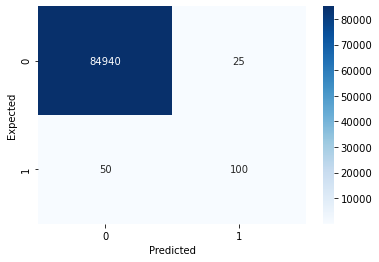

In [9]:
sns.heatmap(matrix, annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [41]:
100/150 * 100   

66.66666666666666

In [ ]:
## thereofre we can see that our accuracy from 99.9% has actually dropped to 66.66% which is not a good model
## we can see that the false negative value is to high for the model which means that many frauds were not reported
## so we can check the accuracy again witht he help of this

In [10]:
roc_auc_score(y_test,y_pred)

0.8331862139312265

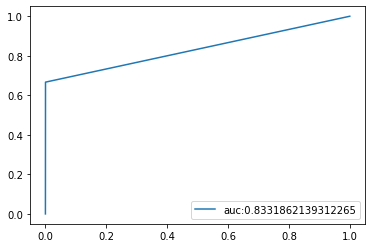

In [11]:
fpr,tpr,_ = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label = "auc:"+str(roc_auc_score(y_test,y_pred)))
plt.legend(loc=4)
plt.show()

In [48]:
## fitting the baseline model but we had an class imbalance so it was expected that accuracy would not be good
## so trying to resample the class imbalance using the oversmapling or undersampling or SMOTE technique

In [ ]:
## firstly using the undersampler method and using the roc_auc_score to determine the accuracy of the model

### Under Sampling

In [15]:
print("original Dataset : %s" % Counter(y))
rus=RandomUnderSampler(random_state=40)
x_under,y_under =rus.fit_resample(x,y)
print("New Dataset : %s" % Counter(y_under))

original Dataset : Counter({0: 283241, 1: 473})
New Dataset : Counter({0: 473, 1: 473})


accuracy score :0.9330985915492958


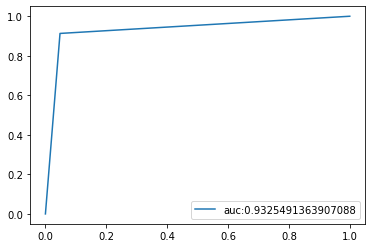

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_under,y_under,test_size=0.3,random_state=40)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("accuracy score :" + str(accuracy_score(y_test,y_pred)))
fpr,tpr,_ = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label = "auc:"+str(roc_auc_score(y_test,y_pred)))
plt.legend(loc=4)
plt.show()

## Over Sampling

In [20]:
print("original Dataset : %s" % Counter(y))
ros=RandomOverSampler(random_state=40)
x_over,y_over =ros.fit_resample(x,y)
print("New Dataset : %s" % Counter(y_over))

original Dataset : Counter({0: 283241, 1: 473})
New Dataset : Counter({0: 283241, 1: 283241})


accuracy score :0.9459236811909736


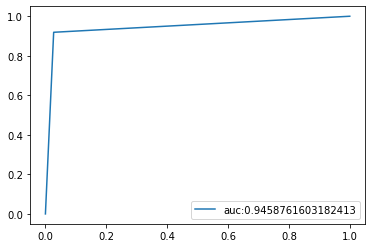

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=40)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("accuracy score :" + str(accuracy_score(y_test,y_pred)))
fpr,tpr,_ = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label = "auc:"+str(roc_auc_score(y_test,y_pred)))
plt.legend(loc=4)
plt.show()

## SMOTE Technique

In [22]:
print("original Dataset : %s" % Counter(y))
smote=SMOTE(random_state=40)
x_smote,y_smote =smote.fit_resample(x,y)
print("New Dataset : %s" % Counter(y_smote))

original Dataset : Counter({0: 283241, 1: 473})
New Dataset : Counter({0: 283241, 1: 283241})


accuracy score :0.957274412309865


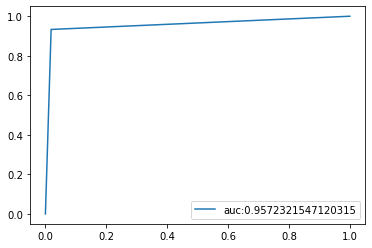

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state=40)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("accuracy score :" + str(accuracy_score(y_test,y_pred)))
fpr,tpr,_ = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label = "auc:"+str(roc_auc_score(y_test,y_pred)))
plt.legend(loc=4)
plt.show()

#### The best accuracy we got was with the SMOTE Technique,
##### but now the question lies is that does the model identify different point values uniquely classwise 
##### or there is an overlap of points and model did not catch it

In [26]:
## firstly reducing the differnet components into 2

In [27]:
x_pca = PCA(2, random_state = 40).fit_transform(x_smote)

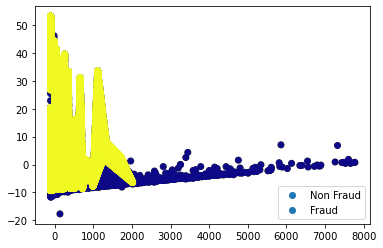

In [32]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=(y_smote==0),label="Non Fraud",cmap="plasma")
plt.scatter(x_pca[:,0],x_pca[:,1],c=(y_smote==1),label="Fraud",cmap="plasma")
plt.show()

### we can see there is a lot of overlapping values for which SMOTE Logistic Regression Model cannot be used

### now implementing different models to the baseline data using the three sampling techniques

In [ ]:
### 1: DecisionTreeClassifier
### 2: RandomForestClassfier
### 3: KMeans Clustering
### 4: SVM. SVC model
### 5: NaiveBayes Model

In [10]:
## Under Sampling

print("original Dataset : %s" % Counter(y))
rus=RandomUnderSampler(random_state=40)
x_under,y_under =rus.fit_resample(x,y)
print("New Dataset : %s" % Counter(y_under))

original Dataset : Counter({0: 283241, 1: 473})
New Dataset : Counter({0: 473, 1: 473})


In [11]:
x_rus_train,x_rus_test,y_rus_train,y_rus_test=train_test_split(x_under,y_under,test_size=0.3,random_state=40)

In [12]:
## Over Sampling

print("original Dataset : %s" % Counter(y))
ros=RandomOverSampler(random_state=40)
x_over,y_over =ros.fit_resample(x,y)
print("New Dataset : %s" % Counter(y_over))

original Dataset : Counter({0: 283241, 1: 473})
New Dataset : Counter({0: 283241, 1: 283241})


In [13]:
x_ros_train,x_ros_test,y_ros_train,y_ros_test=train_test_split(x_over,y_over,test_size=0.3,random_state=40)

In [14]:
## SMOTE Technique

print("original Dataset : %s" % Counter(y))
smote=SMOTE(random_state=40)
x_smote,y_smote =smote.fit_resample(x,y)
print("New Dataset : %s" % Counter(y_smote))

original Dataset : Counter({0: 283241, 1: 473})
New Dataset : Counter({0: 283241, 1: 283241})


In [15]:
x_smote_train,x_smote_test,y_smote_train,y_smote_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state=40)

In [16]:
def dtcclassifier(value1,value2,value3,value4):
    dtc=DecisionTreeClassifier()
    dtc.fit(value1,value3)
    y_pred = dtc.predict(value2)
    score = []
    score.append(accuracy_score(value4,y_pred))
    score.append(roc_auc_score(value4,y_pred))
    return score

In [17]:
def rfcclassifier(value1,value2,value3,value4):
    rfc=RandomForestClassifier()
    rfc.fit(value1,value3)
    y_pred = rfc.predict(value2)
    score = []
    score.append(accuracy_score(value4,y_pred))
    score.append(roc_auc_score(value4,y_pred))
    return score

In [18]:
def kmeansmodel(value1,value2,value3,value4):
    kmeans=KMeans()
    kmeans.fit(value1,value3)
    y_pred = kmeans.predict(value2)
    score = []
    score.append(accuracy_score(value4,y_pred))
    score.append(roc_auc_score(value4,y_pred))
    return score

In [19]:
under_dtc_score = dtcclassifier(x_rus_train,x_rus_test,y_rus_train,y_rus_test)
over_dtc_score =dtcclassifier(x_ros_train,x_ros_test,y_ros_train,y_ros_test)
smote_dtc_score = dtcclassifier(x_smote_train,x_smote_test,y_smote_train,y_smote_test)

In [20]:
under_rfc_score = rfcclassifier(x_rus_train,x_rus_test,y_rus_train,y_rus_test)
over_rfc_score = rfcclassifier(x_ros_train,x_ros_test,y_ros_train,y_ros_test)
smote_rfc_score = rfcclassifier(x_smote_train,x_smote_test,y_smote_train,y_smote_test)

In [21]:
under_kmeans_score = kmeansmodel(x_rus_train,x_rus_test,y_rus_train,y_rus_test)
over_kmeans_score =kmeansmodel(x_ros_train,x_ros_test,y_ros_train,y_ros_test)
smote_kmeans_score = kmeansmodel(x_smote_train,x_smote_test,y_smote_train,y_smote_test)

In [34]:
d = {"type":["under","over","smote"],"decision_tree":[under_dtc_score,over_dtc_score,smote_dtc_score],"random_forest":[under_rfc_score,over_rfc_score,smote_rfc_socre],"Kmeans":[under_kmeans_score,over_kmeans_score,smote_kmeans_socre]}
Mat = pd.DataFrame(data=d)
Mat

,type,decision_tree,random_forest,Kmeans
0,under,"[0.8838028169014085, 0.8848024617828074]","[0.9225352112676056, 0.921878102044868]","[0.36619718309859156, 0.5048391899940441]"
1,over,"[0.9997352084497926, 0.999735673503912]","[0.9999235046632734, 0.9999236390122412]","[0.3552031539615758, 0.5377594518082777]"
2,smote,"[0.998058195298479, 0.9980599906662704]","[0.9998117037865192, 0.9998120344916708]","[0.37376209950278033, 0.5307028191247175]"


In [35]:
## till now based on the accuracy figures Random Forest with oversampling has given the best accuracy 

### Checking the Confusion matrix for the Random Forest classifier

In [38]:
rfc = RandomForestClassifier()
rfc.fit(x_ros_train,y_ros_train)
y_pred = rfc.predict(x_ros_test)
cfm_matrix = confusion_matrix(y_ros_test,y_pred)

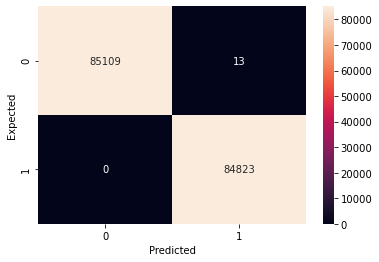

In [46]:
sns.heatmap(pd.DataFrame(cfm_matrix),annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


### The good thing is that now that the model has given no false negative which is a good sign 
### as no frauds are predicted as non fraud

### Now Checking whether the hour of the day makes any difference 

In [49]:
x_new = data[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',"dayhours"]]

In [51]:
ros =  RandomOverSampler(random_state = 40)
x_new_ros,y_new_ros = ros.fit_resample(x_new,y)

In [52]:
x_new_train,x_new_test,y_new_train,y_new_test = train_test_split(x_new_ros,y_new_ros,test_size=0.3,random_state=40)

0.9999293889199447
0.9999295129343765


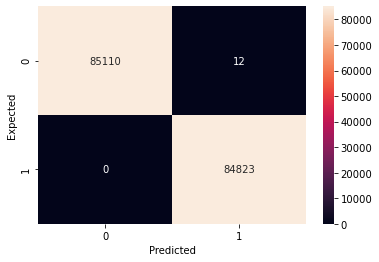

In [54]:
rfc = RandomForestClassifier()
rfc.fit(x_new_train,y_new_train)
y_pred = rfc.predict(x_new_test)
print(accuracy_score(y_new_test,y_pred))
print(roc_auc_score(y_new_test,y_pred))
cfm_matrix = confusion_matrix(y_new_test,y_pred)
sns.heatmap(pd.DataFrame(cfm_matrix),annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()



### Adding the dayhour column gave 1 error prediction less from 13 to 12 which is a good sign but not a significant chnage
### can consider adding the dayhour column.

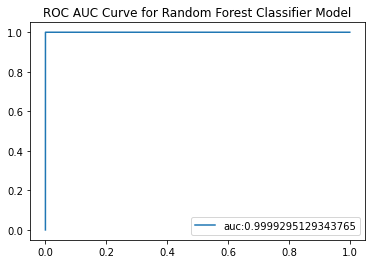

In [59]:
fpr,tpr,_ = roc_curve(y_new_test,y_pred)
plt.plot(fpr,tpr,label = "auc:"+str(roc_auc_score(y_new_test,y_pred)))
plt.legend(loc=4)
plt.title("ROC AUC Curve for Random Forest Classifier Model")
plt.show()